## Задание 1

Выбрать значение шага дискретизации в пределах от 
5 до 15. Продискретизировать с этим шагом дискретизации изображение и вывести его на экран.

In [110]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [111]:
image = cv2.imread('image.jpg')
img = image.copy()

In [112]:
K = 10 # Рамзер шага изображения
s = img.shape # Рамзер исходного изображения и его тональность

h1, w1 = s[0], s[1] # Высота и ширина изображения
h = (s[0] - s[0] % K)
w = (s[1] - s[1] % K)

img = cv2.resize(img, (w, h)) # Замена размера изображения на новые w, h

In [113]:
for y in range(0, h-1, K):
    for x in range(0, w-1, K):
        # Проверка изображения: полутоновое или цветное
        if len(s) > 2:
            s = np.average(img[y:(y + K), x:(x + K)], axis=0)
            img[y:(y + K), x:(x + K)] = np.average(s, axis=0)
        else:
            s = img[y:(y+K), x:(x+K)]
            img[y:(y+K), x:(x+K)] = np.average(s)

In [114]:
img = cv2.resize(img, (w1, h1))
res = np.hstack((image, img))

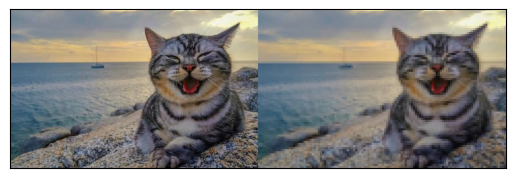

In [116]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # Оригинальное изображение
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB)) # Дискретизированное изображение
plt.xticks([])
plt.yticks([])
plt.show()

## Задание 2

Проквантовать изображение, сократив число градаций до 4.

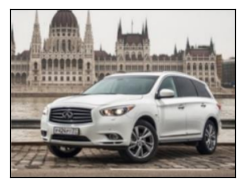

In [125]:
plt.subplot(121)
imgcar = cv2.imread('car.png')

plt.imshow(cv2.cvtColor(imgcar,cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [127]:
# Меняем формат BGR на RGB
imgcar = cv2.cvtColor(imgcar, cv2.COLOR_BGR2RGB)

Z = img.reshape((-1, 3)) # Изменяем размер массива изображения
Z = np.float32(Z) # Преобразуем массив к float

# Критерии для остановки квантования
crt = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 4 # Количество градаций изображения

# Функция квантования
ret, label, center = cv2.kmeans(Z, k, None, crt, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]

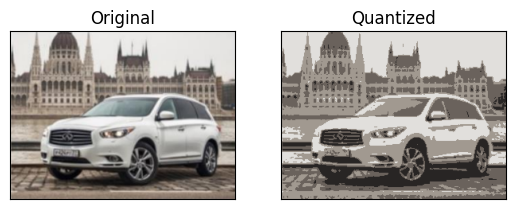

In [128]:
plt.subplot(121)
plt.imshow(imgcar)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(res2)
plt.title('Quantized')
plt.xticks([])
plt.yticks([])
plt.show()